# Multilayer Perceptron

Some say that 9 out of 10 people who use neural networks apply a Multilayer Perceptron (MLP). A MLP is basically a feed-forward network with 3 layers (at least): an input layer, an output layer, and a hidden layer in between. Thus, the MLP has no structural loops: information always flows from left (input)to right (output). The lack of inherent feedback saves a lot of headaches. Its analysis is totally straightforward given that the output of the network is always a function of the input, it does not depend on any former state of the model or previous input.

![Multilayer Perceptron topology](files/multilayer.png)

Regarding the topology of a MLP it is normally assumed to be a densely-meshed one-to-many link model between the layers. This is mathematically represented by two matrices of parameters named “the thetas”. In any case, if a certain connection is of little relevance with respect to the observable training data, the network will automatically pay little attention to its contribution and assign it a low weight close to zero.

## Prediction

The evaluation of the output of a MLP, i.e., its prediction, given an input vector of data is a matter of matrix multiplication. To that end, the following variables are described for convenience:
* $N$ is the dimension of the input layer.
* $H$ is the dimension of the hidden layer.
* $K$ is the dimension of the output layer.
* $M$ is the dimension of the corpus (number of examples).

Given the variables above, the parameters of the network, i.e., the thetas matrices, are defined as follows:
* $\theta^{(IN)} \rightarrow H \times (N+1)$
* $\theta^{(OUT)} \rightarrow K \times (H+1)$

In [11]:
import NeuralNetwork

# 2 input neurons, 3 hidden neurons, 1 output neuron
nn = NeuralNetwork.MLP([2,3,1])

# nn[0] -> ThetaIN, nn[1] -> ThetaOUT
print(nn)

[array([[ 0.46134229,  0.42459821,  0.31052926],
       [ 0.04318592,  0.51459231,  0.18476152],
       [-0.98272842,  0.0665426 ,  0.87261338]]), array([[ 0.86890272, -0.21121202,  0.70903383, -1.05713378]])]


What follows are the ordered steps that need to be followed in order to evaluate the network prediction.

### Input Feature Expansion

The first step to attain a successful operation of the neural network is to add a bias term to the input feature space (mapped to the input layer):

$$a^{(IN)} = [1;\ x]$$

The feature expansion of the input space with the bias term increases the learning effectiveness of the model because it adds a degree of freedom to the adaptation process. Note that $a^{(IN)}$ directly represents the activation values of the input layer. Thus, the input layer is linear with the input vector $x$ (it is defined by a linear activation function).

### Transit to the Hidden Layer

Once the activations (outputs) of the input layer are determined, their values flow into the hidden layer through the weights defined in $\theta^{(IN)}$:

$$z^{(HID)} = \theta^{(IN)}\;a^{(IN)}$$

Similarly, the dimensionality of the hidden layer is expanded with a bias term to increase its learning effectiveness:

$$a^{(HID)} = [1;\ g(z^{(HID)})]$$

Here, a new function $g()$ is introduced. This is the generic activation function of a neuron, and generally it is non-linear. Its application yields the output values of the hidden layer $a^{(HID)}$ and provides the true learning power to the neural model.

### Output

Then, the activation values of the output layer, i.e., the network prediction, are calculated as follows:

$$z^{(OUT)} = \theta^{(OUT)}\;a^{(HID)}$$

and finally

$$a^{(OUT)} = g(z^{(OUT)}) = y$$

### Activation Function

The activation function of the neuron is (usually) a non-linear function that provides the expressive power to the neural network. It is recommended this function to be smooth, differentiable and monotonically non-decreasing (for learning purposes). Typically, the logistic sigmoid function is used.

$$g(z) = \frac{1}{(1 + \exp^{-z})}$$

Note that the range of this function varies from 0 to 1. Therefore, the output values of the neurons will always be bounded by the upper and the lower limits of this range. This entails considering a scaling process if a broader range of predicted values is needed. Other activation functions can be used with the "af" parameter. For example, the range of the hyperbolic tangent ("HyperTan" function) goes from -1 to 1.

In [12]:
import numpy as np

# Random instance with 2 values
x = np.array([1.0, 2.0])
y = NeuralNetwork.MLP_Predict(nn, x)

# intermediate results are available
# y[0] -> input result, y[1] -> hidden result, y[2] -> output result
print(y)

[array([ 1.,  2.]), array([ 0.81861604,  0.71652745,  0.6961521 ]), array([ 0.61493809])]


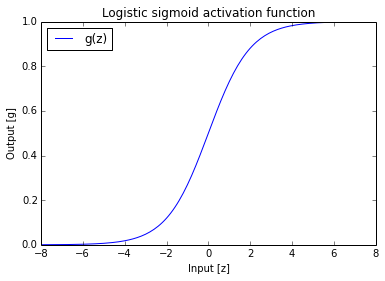

In [13]:
z = np.arange(-8, 8, 0.1)
g = NeuralNetwork.Logistic(z)

%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.plot(z, g, 'b-', label='g(z)')
plt.legend(loc='upper left')
plt.xlabel('Input [z]')
plt.ylabel('Output [g]')
plt.title('Logistic sigmoid activation function')
plt.show()

## Training

Training a neural network essentially means fitting its parameters to a set of example data considering an objective function, aka cost function. This process is also known as supervised learning. It is usually implemented as an iterative procedure.

### Cost Function

The cost function somehow encodes the objective or goal that should be attained with the network. It is usually defined as a classification or a regression evaluation function. However, the actual form of the cost function is effectively the same, which is an error or fitting function. A cost function measures the discrepancy between the desired output for a pattern and the output produced by the network.

The cost function $J$ quantifies the amount of squared error (or misfitting) that the network displays with respect to a set of data. Thus, in order to achieve a successfully working model, this cost function must be minimised with an adequate set of parameter values. To do so, several solutions are valid as long as this cost function be a convex function (i.e., a bowl-like shape). A well known example of such is the quadratic function, which trains the neural network considering a minimum squared error criterion over the whole dataset of training examples:

$$J(\theta, x) = \frac{1}{M} \sum_{m=1}^M \sum_{k=1}^K \left(Error_k^{(m)}\right)^2 = \frac{1}{M} \sum_{m=1}^M \sum_{k=1}^K \left(t_k^{(m)}-y_k^{(m)}\right)^2$$

Note that the term $t$ in the cost function represents the target value of the network (i.e., the ideal/desired network output) for a given input data value $x$. Now that the cost function can be expressed, a convex optimisation procedure (e.g., a gradient-based method) must be conducted in order to minimise its value. Note that this is essentially a least-squares regression.

### Regularisation

The mean squared-error cost function described above does not incorporate any knowledge or constraint about the characteristics of the parameters being adjusted through the optimisation training strategy. This may develop into a generalisation problem because the space of solutions is large and some of these solutions may turn the model unstable with new unseen data. Therefore, there is the need to smooth the performance of the model over a wide range of input data.

Neural networks usually generalise well as long as the weights are kept small. Thus, the Tikhonov regularisation function, aka ridge regression, is introduced as a means to control complexity of the model in favour of its increased general performance. This regularisation approach, which is used in conjunction with the aforementioned cost function, favours small weight values (it is a cost over large weight values):

$$R(\theta) = \frac{\lambda}{2 M} \sum_{\forall \theta \notin bias} \theta^2$$

There is a typical trade-off in Machine Learning, known as the bias-variance trade-off, which has a direct relationship with the complexity of the model, the nature of the data and the amount of available training data to adjust it. This ability of the model to learn more or less complex scenarios raises an issue with respect to its fitting (memorisation v. generalisation): if the data is simple to explain, a complex model is said to overfit the data, causing its overall performance to drop (high variance model). Similarly, if complex data is tackled with a simple model, such model is said to underfit the data, also causing its overall performance to drop (high bias model). As it is usual in engineering, a compromise must be reached with an adequate $\lambda$ value.

### Parameter Initialisation

The initial weights of the thetas assigned by the training process are critical with respect to the success of the learning strategy. They determine the starting point of the optimisation procedure, and depending on their value, the adjusted parameter values may end up in different places if the cost function has multiple (local) minima.

The parameter initialisation process is based on a uniform distribution between two small numbers that take into account the amount of input and output units of the adjacent layers:

$$\theta_{init} = U[-\sigma, +\sigma]\ \ where\ \ \sigma = \frac{\sqrt{6}}{\sqrt{in + out}}$$

In order to ensure a proper learning procedure, the weights of the parameters need to be randomly assigned in order to prevent any symmetry in the topology of the network model (that would be likely to end in convergence problems).

### Gradient Descent

Given the convex shape of the cost function (which usually also includes the regularisation), the minimisation objective boils down to finding the extremum of this function using its derivative in the continuos space of the weights. To this end you may use the analytic form of the derivative of the cost function (a nightmare), a numerical finite difference, or automatic differentiation.

Gradient descent is a first-order optimisation algorithm, complete but non-optimal. It first starts with some arbitrarily chosen parameters and computes the derivative of the cost function with respect to each of them $\frac{\partial J(\theta,x)}{\partial \theta}$. The model parameters are then updated by moving them some distance (determined by the so called learning rate $\eta$) from the former initial point in the direction of the steepest descent, i.e., along the negative of the gradient. If $\eta$ is set too small, though, convergence is needlessly slow, whereas if it is too large, the update correction process may overshoot and even diverge.

$$\theta^{t+1} \leftarrow \theta^t - \eta \frac{\partial^t J(\theta,x)}{\partial \theta} $$

These steps are iterated in a loop until some stopping criterion is met, e.g., a determined number of epochs (i.e., the processing of all patterns in the training example set) is reached, or when no significant improvement is observed.

#### Stochastic versus Batch Learning

One last remark should be made about the amount of examples $M$ used in the cost function for learning. If the training procedure considers several instances at once per cost gradient computation and parameter update, i.e., $M \gg 1$, the approach is called batch learning. Batch learning is usually slow because each cost computation accounts for all the available training instances, and especially if the data redundancy is high (similar patterns). However, the conditions of convergence are well understood.

Alternatively, it is usual to consider only one single training instance at a time, i.e., $M=1$, to estimate the gradient in order to speed up the iterative learning process. This procedure is called stochastic (online) learning. Online learning steps are faster to compute, but this noisy single-instance approximation of the cost gradient function makes it a little inaccurate around the optimum. However, stochastic learning often results in better solutions because of the noise in the updates, and thus it is very convenient in most cases.

In [14]:
# Load Iris dataset
from sklearn import datasets as dset
import copy

iris = dset.load_iris()

# build network with 4 input, 1 output
nn = NeuralNetwork.MLP([4,4,1])

# keep original for further experiments
orig = copy.deepcopy(nn)

# Target needs to be divided by 2 because of the sigmoid, values 0, 0.5, 1
idat, itar = iris.data, iris.target/2.0

# regularisation parameter of 0.2
tcost = NeuralNetwork.MLP_Cost(nn, idat, itar, 0.2)

# Cost value for an untrained network
print("J(ini) = " + str(tcost))

# Train with numerical gradient, 20 rounds, batch
# learning rate is 0.1
NeuralNetwork.MLP_NumGradDesc(nn, idat, itar, 0.2, 20, 0.1)

J(ini) = 0.190225295146
J(0) = 0.176597276551
J(1) = 0.166449794007
J(2) = 0.15978678443
J(3) = 0.155663219807
J(4) = 0.153082110438
J(5) = 0.151361935359
J(6) = 0.150096475413
J(7) = 0.149046019548
J(8) = 0.148059359187
J(9) = 0.147027418784
J(10) = 0.145855924682
J(11) = 0.14444895802
J(12) = 0.142701554528
J(13) = 0.140507269294
J(14) = 0.137795918163
J(15) = 0.134614743415
J(16) = 0.131214474997
J(17) = 0.128005994046
J(18) = 0.125326101813
J(19) = 0.123255428432
Elapsed time = 3.6347489357 seconds


### Backpropagation

The backpropagation algorithm estimates the error for each neuron unit so as to effectively deploy the gradient descent optimisation procedure. It is a popular algorithm, conceptually simple, computationally efficient, and it often works. In order to conduct the estimation of the neuron-wise errors, it first propagates the training data through the network,  then it computes the error with the predictions and the target values, and afterwards it backpropagates the error from the output to the input, generally speaking, from a given layer $(n)$ to the immediately former one $(n-1)$:

$$Error^{(n-1)} = Error^{(n)} \; \theta^{(n)}$$

Note that the bias neurons don't backpropagate, they are not connected to the former layer.

Finally, the gradient is computed so that the weights may be updated. Each weight links an input unit $I$ to an output unit $O$, which also provides the error feedback. The general formula that is derived for a logistic sigmoid activation function is shown as folows:

$$\theta^{(t+1)} \leftarrow \theta^{(t)} + \eta \; I \; Error \; O \; (1 - O)$$

From a computational complexity perspective, Backpropagation is much more effective than the numerical gradient applied above because it computes the errors for all the weights in 2 network traversals, whereas numerical gradient needs to compute 2 traversals per parameter. In addition, stochastic learning is generally the preferred method for Backprop.

In [15]:
# Iris example with Backprop

# load original network
nn = copy.deepcopy(orig)

# Cost value for an untrained network
tcost = NeuralNetwork.MLP_Cost(nn, idat, itar, 0.2)
print("J(ini) = " + str(tcost))

# Train with numerical gradient, 20 rounds
# learning rate is 0.1
NeuralNetwork.MLP_Backprop(nn, idat, itar, 0.2, 20, 0.1)

J(ini) = 0.190225295146
J(0) = 0.210753967513
J(1) = 0.171440585973
J(2) = 0.123691544254
J(3) = 0.0864647094107
J(4) = 0.0671969287148
J(5) = 0.058489862934
J(6) = 0.0545650791155
J(7) = 0.0527572869884
J(8) = 0.0519049332513
J(9) = 0.0514797932695
J(10) = 0.0512677581317
J(11) = 0.0511888931484
J(12) = 0.0512013148995
J(13) = 0.0512708124973
J(14) = 0.051366940638
J(15) = 0.0514662247609
J(16) = 0.0515536760846
J(17) = 0.051621011596
J(18) = 0.0516639229285
J(19) = 0.0516801295206
Elapsed time = 0.912276029587 seconds


### Practical Techniques

Backpropagation learning can be tricky particularly for multilayered networks where the cost surface is non-quadratic, non-convex, and high dimensional with many local minima and/or flat regions. Its successful convergence is not guarateed. Designing and training a MLP using Backprop requires making choices such as the number and type of nodes, layers, learning rates, training and test sets, etc, and many undesirable behaviours can be avoided with practical techniques.

#### Instance Shuffling

In stochastic learning neural networks learn the most from the unexpected instances. Therefore, it is advisable to iterate over instances that are the most unfamiliar to the system (i.e., have the maximum information content). As a means to progress towards getting more chances for learning better, it is recommended to shuffle the training set so that successive training instances rarely belong to the same class.

In [16]:
from sklearn.utils import shuffle

# load original network
nn = copy.deepcopy(orig)

# shuffle instances
idat, itar = shuffle(idat, itar)

NeuralNetwork.MLP_Backprop(nn, idat, itar, 0.2, 20, 0.1)

J(0) = 0.0682368810819
J(1) = 0.0417199133578
J(2) = 0.0315061299042
J(3) = 0.0264972274942
J(4) = 0.0234335034004
J(5) = 0.0213585773284
J(6) = 0.0198743228208
J(7) = 0.0187738718684
J(8) = 0.0179348376091
J(9) = 0.017278820927
J(10) = 0.016752915272
J(11) = 0.0163201147669
J(12) = 0.015953898303
J(13) = 0.0156350062017
J(14) = 0.0153494683224
J(15) = 0.0150873667407
J(16) = 0.0148419918866
J(17) = 0.0146091530341
J(18) = 0.0143865166372
J(19) = 0.0141729656303
Elapsed time = 0.88114118576 seconds


#### Feature Standardisation

Convergence is usually faster if the average of each input feature over the training set is close to zero, otherwise the updates will be biased in a particular direction and thus will slow learning.

Additionally, scaling the features so that all have about the same covariance speeds learning because it helps to balance out the rate at which the weights connected to the input nodes learn.

In [17]:
# feature stats
mu_idat = np.mean(idat, axis=0)
std_idat = np.std(idat, axis=0)

# standardise
s_idat = (idat - mu_idat) / std_idat

# eval
test = copy.deepcopy(orig)
NeuralNetwork.MLP_Backprop(test, s_idat, itar, 0.2, 20, 0.1)

J(0) = 0.0523370538733
J(1) = 0.0337756553682
J(2) = 0.0270653270919
J(3) = 0.0237540248914
J(4) = 0.0217543183134
J(5) = 0.0203610671667
J(6) = 0.0192934022444
J(7) = 0.0184263828903
J(8) = 0.01769901178
J(9) = 0.0170782698247
J(10) = 0.0165439066423
J(11) = 0.0160817888099
J(12) = 0.0156809844911
J(13) = 0.0153324934183
J(14) = 0.0150286798281
J(15) = 0.0147629899769
J(16) = 0.0145297789721
J(17) = 0.0143241801037
J(18) = 0.0141419944603
J(19) = 0.0139795948063
Elapsed time = 0.779333114624 seconds


#### Feature Decorrelation

If inputs are uncorrelated then it is possible to solve for the weight values independently. With correlated inputs, the solution must be searched simultaneously, which is a much harder problem. Principal Component Analysis (aka the Karhunen-Loeve expansion) can be used to remove linear correlations in inputs.

In [18]:
# construct orthogonal basis with principal vectors
covmat = np.cov(s_idat.T)
l,v = np.linalg.eig(covmat)

# reproject
d_s_idat = s_idat.dot(v)

# eval
test = copy.deepcopy(orig)
NeuralNetwork.MLP_Backprop(test, d_s_idat, itar, 0.2, 20, 0.1)

J(0) = 0.06554149571
J(1) = 0.037324025947
J(2) = 0.028728921096
J(3) = 0.0249406884732
J(4) = 0.0228213629049
J(5) = 0.021415706904
J(6) = 0.0203630759712
J(7) = 0.0195081056515
J(8) = 0.0187778935497
J(9) = 0.0181360491059
J(10) = 0.0175632977734
J(11) = 0.0170485881247
J(12) = 0.0165848154958
J(13) = 0.0161667397594
J(14) = 0.0157899953346
J(15) = 0.0154506502998
J(16) = 0.0151450337491
J(17) = 0.0148696850601
J(18) = 0.0146213512749
J(19) = 0.0143969979774
Elapsed time = 0.779126882553 seconds


#### Target Values

Target values at the sigmoid asymptotes need to be driven by large weights, which can result in instabilities. Instead, target values at the points of the extrema of the second derivative of the sigmoid activation function avoid saturating the output units. The second derivative of the logistic sigmoid is $g''(z) = g(z)(1 - g(z))(1 - 2g(z))$, shown below.

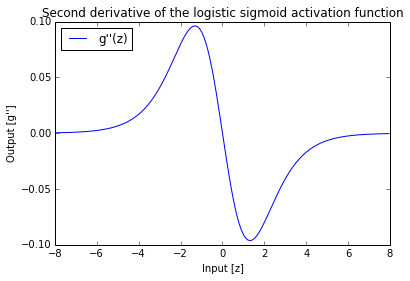

Max target -1.3 -> 0.214165016957
Min target 1.3 -> 0.785834983043


In [19]:
g = NeuralNetwork.Logistic
ddg = g(z)*(1 - g(z))*(1 - 2*g(z))

plt.figure()
plt.plot(z, ddg, 'b-', label='g\'\'(z)')
plt.legend(loc='upper left')
plt.xlabel('Input [z]')
plt.ylabel('Output [g\'\']')
plt.title('Second derivative of the logistic sigmoid activation function')
plt.show()

# max min target values
mx = max(ddg)
mi = min(ddg)
c = 0
for i in ddg:
    if i == mx:
        print("Max target " + str(z[c]) + " -> " + str(g(z[c])))
    if i == mi:
        print("Min target " + str(z[c]) + " -> " + str(g(z[c])))
    c += 1

Therefore, optimum target values must be at 0.21 and 0.79.

In [20]:
for i in xrange(len(itar)):
    if itar[i] == 0:
        itar[i] = 0.21
    if itar[i] == 1:
        itar[i] = 0.79
test = copy.deepcopy(orig)
NeuralNetwork.MLP_Backprop(test, d_s_idat, itar, 0.2, 20, 0.1)

J(0) = 0.023827172164
J(1) = 0.0105960582951
J(2) = 0.00689965410664
J(3) = 0.00564065279975
J(4) = 0.00511918611814
J(5) = 0.00485322132217
J(6) = 0.00468529456735
J(7) = 0.00455867238725
J(8) = 0.00445156683676
J(9) = 0.00435525075903
J(10) = 0.00426611403831
J(11) = 0.00418260562598
J(12) = 0.00410401130004
J(13) = 0.00402995467467
J(14) = 0.00396019200834
J(15) = 0.00389452846363
J(16) = 0.00383278490424
J(17) = 0.00377478563797
J(18) = 0.00372035469683
J(19) = 0.00366931546655
Elapsed time = 0.78206205368 seconds


#### Target Vectors

When designing a learning system, it is suitable to take into account the nature of the problem at hand (e.g., whether if it is a classification problem or a regression problem) to determine the number of output units $K$.

In the case of classification, $K$ should be the amount of different classes, and the target output should be a binary vector. Given an instance, only the output unit that corresponds to the instance class should be set. This approach is usually referred to as "one-hot" encoding. The decision rule for classification is then driven by the maximum output unit.

In the case of a regression problem, $K$ should be equal to the number of dependent variables.

In [21]:
# Iris is a classification problem, K=3

# build network with 4 input, 3 outputs
test3 = NeuralNetwork.MLP([4,4,3])

# modify targets
t = []
for i in itar:
        if i == 0.21:
                t.append([0.79,0.21,0.21])
        elif i == 0.5:
                t.append([0.21,0.79,0.21])
        else:
                t.append([0.21,0.21,0.79])

t = np.array(t)

NeuralNetwork.MLP_Backprop(test3, d_s_idat, t, 0.2, 20, 0.1)

J(0) = 0.146039962848
J(1) = 0.123696062492
J(2) = 0.112324148354
J(3) = 0.105530905347
J(4) = 0.100608446283
J(5) = 0.0964054172643
J(6) = 0.092489051251
J(7) = 0.0887326759989
J(8) = 0.0851165841373
J(9) = 0.0816346452278
J(10) = 0.078265934502
J(11) = 0.074979629429
J(12) = 0.0717474249261
J(13) = 0.068551693191
J(14) = 0.0653878281377
J(15) = 0.062262700165
J(16) = 0.0591912813568
J(17) = 0.0561928474591
J(18) = 0.0532875724887
J(19) = 0.0504939199725
Elapsed time = 0.821996927261 seconds


Finally, the effectiveness/performance of each approach should be scored with an appropriate metric: squared-error residuals like the cost function for regression problems, and competitive selection for classification.

In [22]:
# compare accuracies between single K and multiple K
single = 0
multiple = 0
for x,y in zip(d_s_idat, itar):
    ps = NeuralNetwork.MLP_Predict(test, x)
    ps = ps[-1][0]
    pm = NeuralNetwork.MLP_Predict(test3, x)
    pm = [pm[-1][0], pm[-1][1], pm[-1][2]]
    if y == 0.21: # class 0
        if np.abs(ps - 0.21) < np.abs(ps - 0.5):
            if np.abs(ps - 0.21) < np.abs(ps - 0.79):
                single += 1
        if pm[0] > pm[1]:
            if pm[0] > pm[2]:
                multiple += 1
    elif y == 0.5: # class 1
        if np.abs(ps - 0.5) < np.abs(ps - 0.21):
            if np.abs(ps - 0.5) < np.abs(ps - 0.79):
                single += 1
        if pm[1] > pm[0]:
            if pm[1] > pm[2]:
                multiple += 1
    else: # class 2
        if np.abs(ps - 0.79) < np.abs(ps - 0.21):
            if np.abs(ps - 0.79) < np.abs(ps - 0.5):
                single += 1
        if pm[2] > pm[0]:
            if pm[2] > pm[1]:
                multiple += 1
print("Accuracy single: " + str(single))
print("Accuracy multiple: " + str(multiple))

Accuracy single: 145
Accuracy multiple: 142


#### Hidden Units

The number of hidden units determines the expressive power of the network, and thus, the complexity of its transfer function. The more complex a model is, the more complicated data structures it can learn. Nevertheless, this argument cannot be extended ad infinitum because a shortage of training data with respect to the amount of parameters to be learnt may lead the model to overfit the data. That’s why the aforementioned regularisation function is also used to avoid this situation.

Thus, it is common to have a skew toward suggesting a slightly more complex model than strictly necessary (regularisation will compensate for the extra complexity if necessary). Some heuristic guidelines to guess this optimum number of hidden units indicate an amount somewhat related to the number of input and output units. This is an experimental issue, though. There is no rule of thumb for this. Apply a configuration that works for your problem and you’re done.

#### Final Remarks

* Tweak the network: different activation function, adaptive learning rate, momentum, annealing, noise, etc.
* Focus on model generalisation: keep a separate self-validation set of data (not used to train the model) to test and estimate the actual performance of the model. See [test_iris.py](test_iris.py)
* Incorporate as much knowledge as possible. Expertise is a key indicator of success. Data driven models don’t do magic, the more information that is available, the greater the performance of the model.
* Feature Engineering is of utmost importance. This relates to the former point: the more useful information that can be extracted from the input data, the better performance can be expected. Salient indicators are keys to success. This may lead to selecting only the most informative features (mutual information, chi-square...), or to change the feature space that is used to represent the instance data (Principal Component Analysis for feature extraction and dimensionality reduction). And always standardise your data and exclude outliers.
* Get more data if the model is not good enough. Related to “the curse of dimensionality” principle: if good data is lacking, no successful model can be obtained. There must be a coherent relation between the parameters of the model (i.e., its complexity) and the amount of available data to train them.
* Ensemble models, integrate criteria. Bearing in mind that the optimum model structure is not known in advance, one of the most reasonable approaches to obtain a fairly good guess is to apply different models (with different learning features) to the same problem and combine/weight their outputs. Related techniques to this are also known as “boosting”.